In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-05-15 09:29:12.431277: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 09:29:12.487066: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 09:29:13.512108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
y = data["target"].to_numpy()

In [4]:
X = data.iloc[:, :-1].to_numpy()

In [5]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [6]:
X

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [7]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.25)

In [8]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
X_valid = scaler.transform(X_valid)

In [13]:
len(X_train), len(X_test)

(892, 149)

In [14]:
len(Y_train), len(Y_test)

(892, 149)

### Train the model

In [15]:
N, D = X_train.shape

In [16]:
K = 1

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

2024-05-15 09:29:16.322720: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:29:16.323053: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3481 - loss: 0.9323 - val_accuracy: 0.4228 - val_loss: 0.8872
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4085 - loss: 0.8993 - val_accuracy: 0.4497 - val_loss: 0.8350
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4222 - loss: 0.8583 - val_accuracy: 0.4698 - val_loss: 0.7881
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4634 - loss: 0.7831 - val_accuracy: 0.5101 - val_loss: 0.7447
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5219 - loss: 0.7578 - val_accuracy: 0.5705 - val_loss: 0.7061
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5803 - loss: 0.7182 - val_accuracy: 0.5906 - val_loss: 0.6711
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5962 - loss: 0.6748 - val_accuracy: 0.6309 - val_loss: 0.6390
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.6651 - val_accuracy: 0.6644 - val_loss:

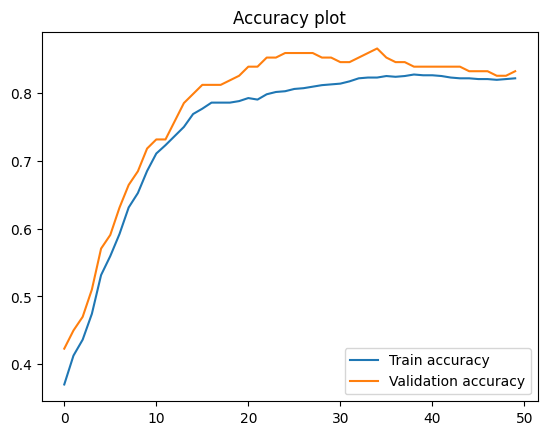

In [20]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

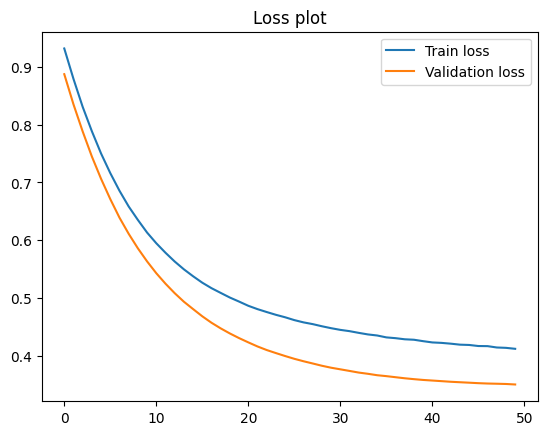

In [21]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [22]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 82.17%


In [23]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.41217586398124695%


In [24]:
evaluation = model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3645 


In [25]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 83.89%


In [26]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.3945155143737793


In [27]:
Y_pred = np.round(model.predict(X_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [28]:
confusion_matrix = confusion_matrix(Y_pred, Y_test) 

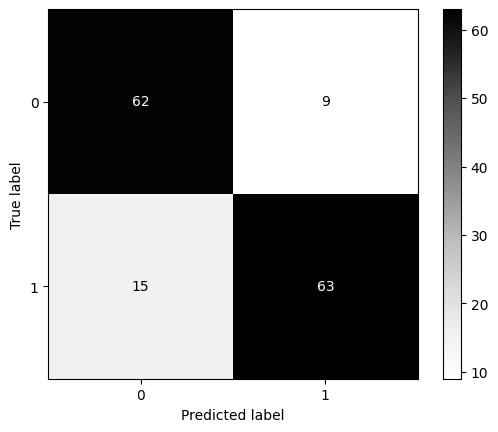

In [30]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot(cmap="Greys");